## sx_real_data模量积分计算测试代码

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
df = {}
# 读取数据
url = 'sx_real_data.xlsx'
df = pd.read_excel(url, sheet_name=None)
data_HF = [[k, v] for k, v in df.items()]  # k is the sheet name, v is the pandas df
# 循环遍历 data_HF 列表并获取下标
data_train=pd.DataFrame()
data_valid=pd.DataFrame()
data_special=pd.DataFrame()
for i, (sheet_name, sheet_data) in enumerate(data_HF):
    # #去除 sheet_data 中的零值
    # sheet_data = sheet_data[(sheet_data != 0).all(axis=1)]
    if i==0:
        data_valid=sheet_data
    if i==0 :
        data_train=pd.concat([data_train, sheet_data], ignore_index=True)

df_hf = pd.concat([data_train, data_valid], ignore_index=True)
# 从data_train提取特征和标签
X_train_raw = data_train[['gamma']].values
y_train_raw = data_train[['sigma']].values


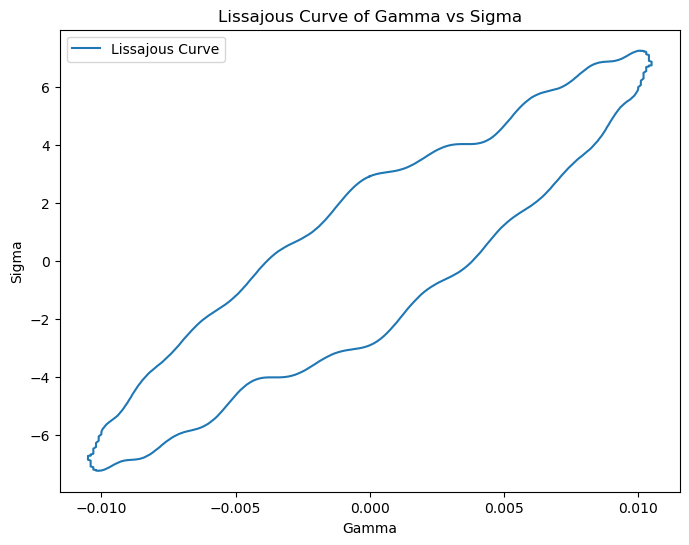

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(X_train_raw*100, y_train_raw, label='Lissajous Curve')
plt.xlabel('Gamma')
plt.ylabel('Sigma')
plt.title('Lissajous Curve of Gamma vs Sigma')
plt.legend()
plt.show()

In [11]:
import numpy as np

# 直接从 data_train DataFrame 中提取 gamma 和 sigma 列，确保得到的是一维的 numpy 数组
gamma = data_train['gamma'].to_numpy(dtype=np.float64)*100
sigma = data_train['sigma'].to_numpy(dtype=np.float64)

# 检查曲线是否闭合：如果首尾不一致，则将起始点追加到数组末尾，使曲线闭合
if not (np.isclose(gamma[0], gamma[-1]) and np.isclose(sigma[0], sigma[-1])):
    gamma = np.append(gamma, gamma[0])
    sigma = np.append(sigma, sigma[0])

# 使用鞋带公式计算闭合曲线的面积，即储存模量（最精确的面积计算方法）
area = 0.5 * np.abs(np.dot(gamma, np.roll(sigma, -1)) - np.dot(sigma, np.roll(gamma, -1)))

print(f"曲线的面积（储存模量）为: {area}")



曲线的面积（储存模量）为: 0.07491384583100036


# 储存模量 \(G'\) 与弹性 Lissajous 曲线

**定义：**  
储存模量 \(G'\) 描述材料在周期性变形中储存并可恢复的能量。在小振幅（线性）情况下，常用应力与应变之间关系的初始斜率来定义：
$$
G' = \frac{d\sigma}{d\gamma}|_{\gamma=0}
$$

**曲线关系：**  
弹性 Lissajous 曲线（应力–应变曲线）主要反映材料的储能部分。其局部斜率在零应变处能给出 \(G'\) 的值，但该曲线的整体面积并不能直接用来量化储存模量，而更多地反映了材料的非线性弹性响应（例如弹性硬化或软化）的特征。

---

# 损耗模量 \(G''\) 与黏性 Lissajous 曲线

**定义：**  
损耗模量 \(G''\) 表征材料在变形过程中因分子内摩擦和其他耗散机制而损失的能量。在小振幅下，单位体积每个周期内的耗散能量 \(W_d\) 与 \(G''\) 满足：
\[
W_d = \pi \gamma_0^2 G'',
\]
其中 \(\gamma_0\) 是应变幅值，因此可以定义：
\[
G'' = \frac{W_d}{\pi \gamma_0^2}.
\]

**曲线关系：**  
黏性 Lissajous 曲线（应力–应变率曲线）的包围面积正好反映了每个振荡周期内耗散的能量。在小振幅（线性）条件下，这个面积与 \(G''\) 成正比；在非线性情况下，虽然需要引入广义定义，但其基本意义仍是衡量能量耗散。

---

# 非线性（LAOS）条件下的广义模量

当材料进入非线性响应区（大振幅条件），传统的 \(G'\) 和 \(G''\) 定义不再充分描述材料行为。此时：

- **广义储存模量** 可以通过分析弹性 Lissajous 曲线在零应变附近的局部斜率获得，或通过傅里叶分解第一谐波的实部来定义。

- **广义损耗模量** 则可通过计算黏性 Lissajous 曲线所包围的面积，再归一化到应变幅值的平方（即 \(G'' = \frac{W_d}{\pi \gamma_0^2}\) 的推广形式）来确定。
